In [3]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c statistella

# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/statistella.zip'
with ZipFile(dataset,'r') as z:
  z.extractall()
  print('Done')


 68% 25.0M/36.6M [00:00<00:00, 97.9MB/s]
100% 36.6M/36.6M [00:00<00:00, 107MB/s] 
Done


# **Project Overview**

In this project, we Leverage Data Analytics📊 to Identify Credit Faults and Enhance Decision-Making in Microfinance Institutions. Main goal is to analyze the data and develop a predictive model to identify borrowers at risk of defaulting on their loans This model will support the bank in making informed credit decisions, reducing the risk of defaults, and improving overall financial stability.

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [51]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

id_col = test['ID']
pd.set_option('display.max_columns', None)
data.head()

,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196348,0,Cash loans,F,N,Y,2,225000.0,785398.5,33403.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-13629,-514,-7712.0,-2405,NaN,1,1,0,1,0,0,NaN,4.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Business Entity Type 3,NaN,0.726410,0.513694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-707.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,147976,0,Cash loans,M,N,Y,0,90000.0,592560.0,35937.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-11983,-1863,-11266.0,-3484,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.298043,NaN,0.1845,0.0881,0.9841,0.7824,0.0928,0.2000,0.1724,0.3333,0.3750,0.0389,0.1505,0.1718,0.0000,0.0000,0.1880,0.0914,0.9841,0.7909,0.0937,0.2014,0.1724,0.3333,0.3750,0.0398,0.1644,0.1790,0.0000,0.0000,0.1863,0.0881,0.9841,0.7853,0.0934,0.20,0.1724,0.3333,0.3750,0.0396,0.1531,0.1749,0.0000,0.0000,reg oper spec account,block of flats,0.1859,Panel,No,3.0,0.0,3.0,0.0,-93.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,52662,0,Revolving loans,F,N,Y,1,126000.0,202500.0,10125.0,202500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15182,-2033,-4189.0,-4115,NaN,1,1,1,1,1,0,Sales staff,3.0,2,2,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.573605,0.429424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1753.0,0,0,0,0,0,0,0,0,

# **Exploratory Data Analysis**

In [52]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

print(f'Number of numerical columns: {data.select_dtypes(include=np.number).shape[1]}')
print(f'Number of categorical columns: {data.select_dtypes(include="object").shape[1]}')

Number of rows: 215258
Number of columns: 122
Number of numerical columns: 106
Number of categorical columns: 16


In [53]:
# summary stats of numerical columns
pd.set_option('display.max_columns', None)
data.describe()

,ID,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,215258.00000,215258.000000,215258.000000,2.152580e+05,2.152580e+05,215249.000000,2.150840e+05,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,73154.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215256.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.00000,215258.000000,215258.000000,215258.000000,215258.000000,93829.000000,2.147830e+05,172510.000000,105929.000000,89186.000000,110231.000000,72110.000000,64758.000000,100481.000000,106822.000000,108105.000000,69181.000000,87369.000000,68083.000000,107166.000000,65803.000000,96432.000000,105929.000000,89186.000000,110231.000000,72110.000000,64758.000000,100481.000000,106822.000000,108105.000000,69181.000000,87369.000000,68083.000000,107166.000000,65803.000000,96432.000000,105929.000000,89186.000000,110231.000000,72110.000000,64758.000000,100481.000000,106822.000000,108105.000000,69181.000000,87369.000000,68083.000000,107166.000000,65803.000000,96432.000000,111317.000000,214546.000000,214546.000000,214546.000000,214546.000000,215257.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,215258.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000,186186.000000
mean,107628.50000,0.080731,0.417076,1.688900e+05,5.994893e+05,27125.796166,5.387622e+05,0.020869,-16037.328169,63865.074181,-4985.649732,-2994.077725,12.073502,0.999995,0.819751,0.199119,0.998044,0.280366,0.056867,2.153362,2.052885,2.031883,12.064764,0.015200,0.05079,0.040417,0.078125,0.230588,0.179566,0.501568,5.140282e-01,0.510706,0.117377,0.088484,0.977673,0.752469,0.044679,0.078687,0.149802,0.226015,0.231711,0.066284,0.100669,0.107308,0.008877,0.028265,0.114129,0.087550,0.976982,0.759686,0.042601,0.074196,0.145249,0.222090,0.227979,0.064906,0.105483,0.105853,0.008137,0.026958,0.117740,0.087962,0.977697,0.755752,0.044624,

In [54]:
# summary stats of categorical columns
pd.set_option('display.max_columns', None)
data.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,215258,215258,215258,215258,214376,215258,215258,215258,215258,147594,215258,215258,68040,107159,105767,113212
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,194860,141571,142102,149270,173985,111204,152933,137714,191154,38656,37724,47863,51659,105304,46219,111611


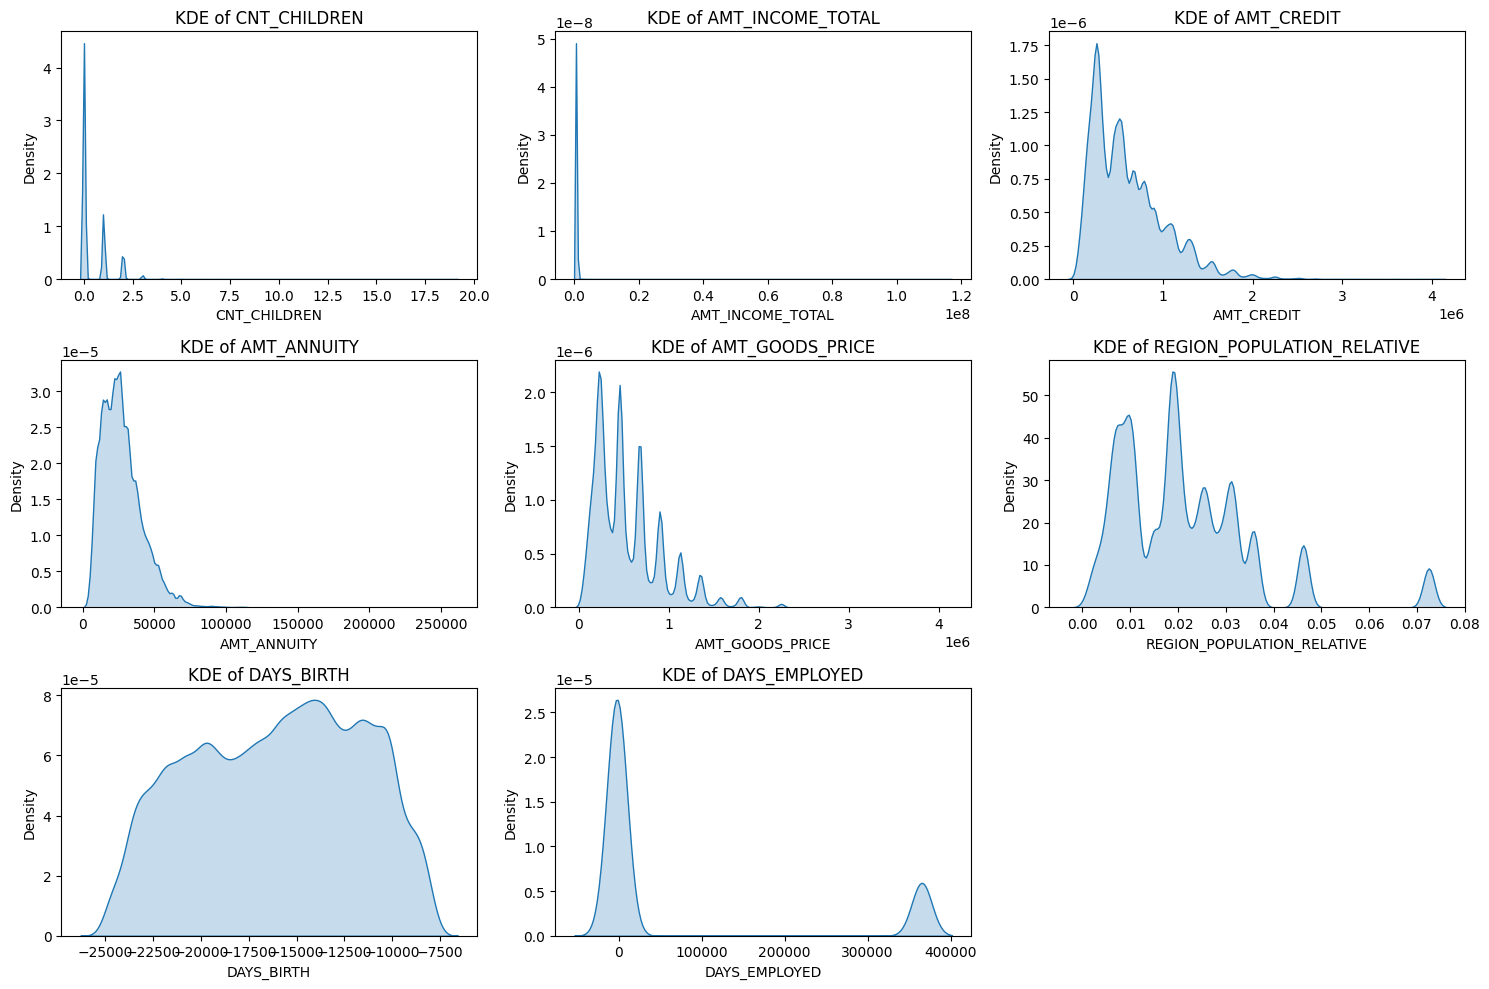

In [55]:
#Checking skewness
columns_to_plot = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                   'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.kdeplot(data[column], fill =True)
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()


**Inference**: Data in following columns seems to be skewed, so So, it will make sense to perform **Log Transformation** on them so that data become more symmetric, stabilizing the variance and eventually, improving the performance of our model.

1.   AMT_INCOME_TOTAL: strong right skewed.
2.   AMT_CREDIT: Right-skewed distribution.
3.   AMT_ANNUITY: Right-skewed.
4.   AMT_GOODS_PRICE: Right-skewed.

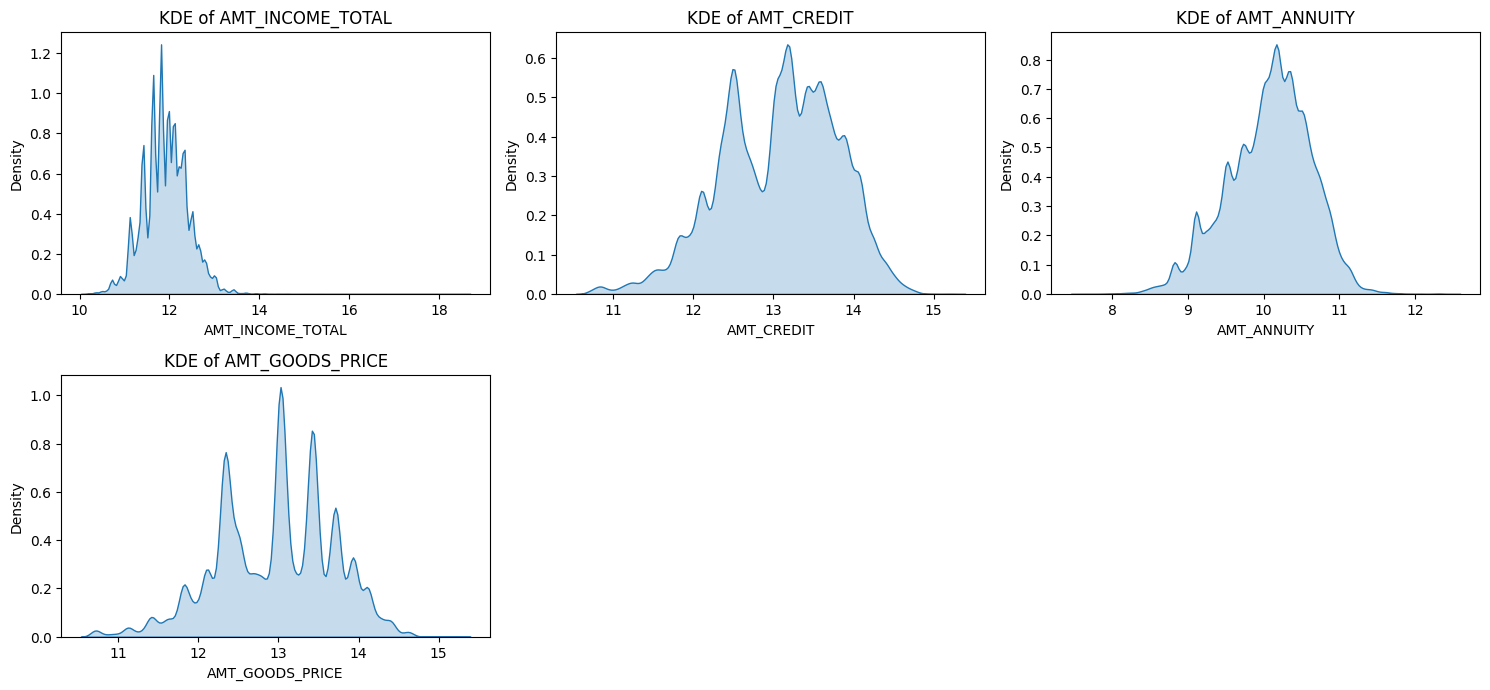

In [56]:
#kde plots after log transformation
logt_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
plt.figure(figsize=(15, 10))

for i, column in enumerate(logt_cols, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.kdeplot(np.log1p(data[column]), fill =True)
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()

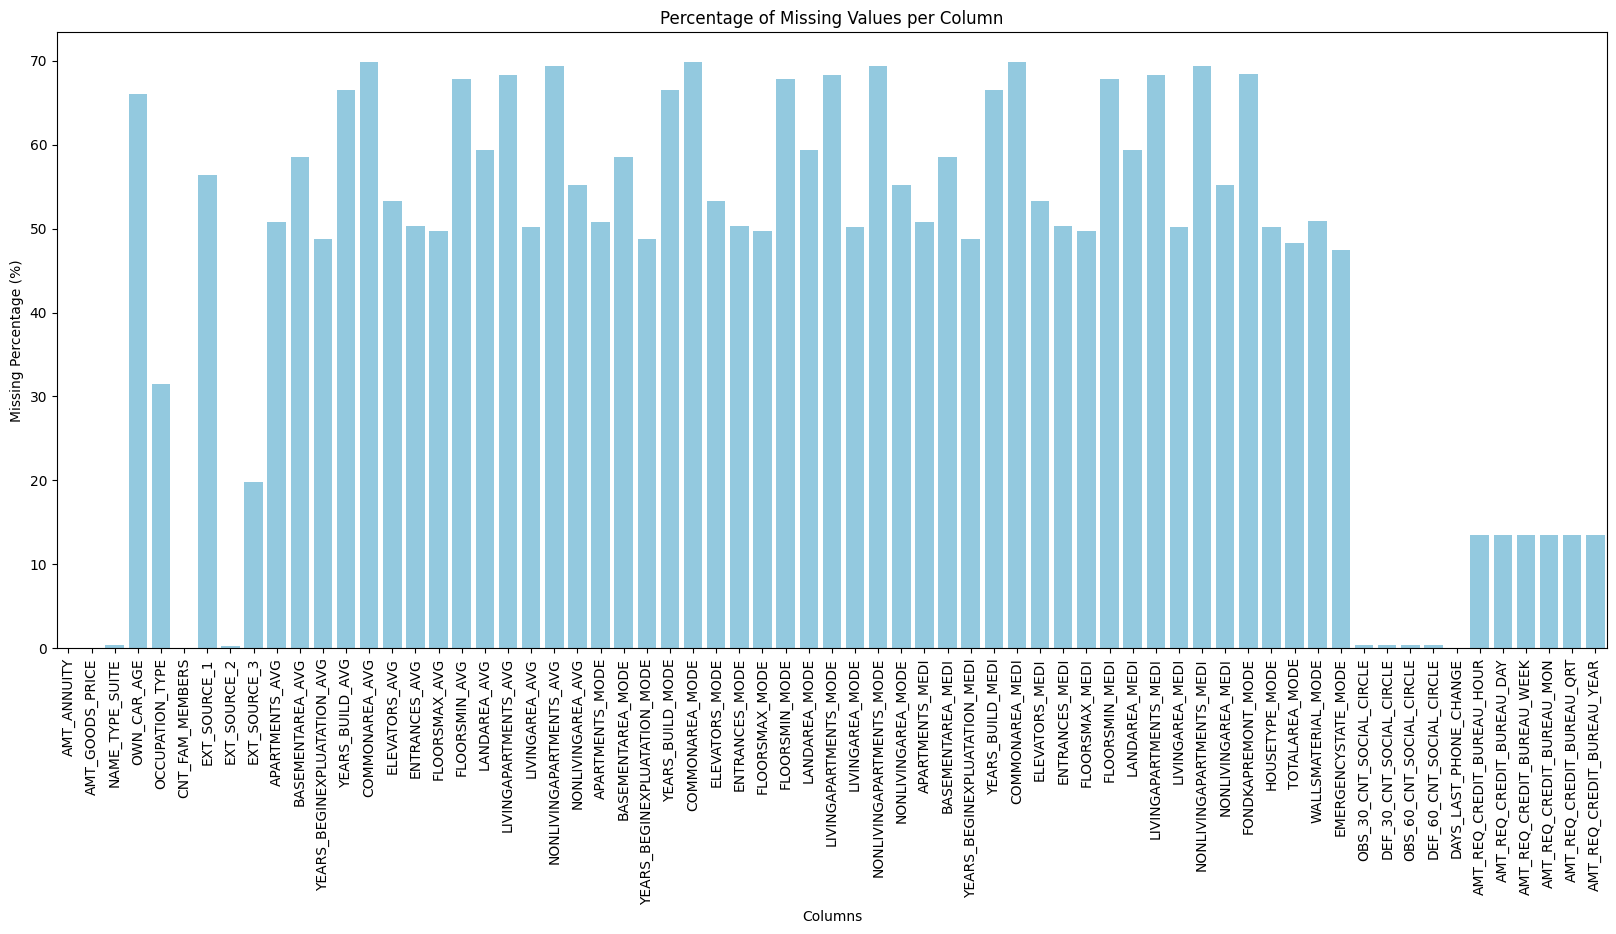

In [57]:
#visualizing distribution of missing values accross columns
plt.figure(figsize=(20, 8))

missing_percentage = (data.isna().sum() / len(data)) * 100

missing_data = pd.DataFrame({
    'Columns': data.columns,
    'MissingPercentage': missing_percentage
})

missing_data = missing_data[missing_data['MissingPercentage'] > 0]

# Plot using barplot
sns.barplot(x='Columns', y='MissingPercentage', data=missing_data, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Missing Percentage (%)")
plt.title("Percentage of Missing Values per Column")
plt.show()


In [58]:
# Calculate the percentage of missing values in each column
missing_percentage = data.isna().mean() * 100

# Find columns with more than 60% missing values
cols_miss60 = missing_percentage[missing_percentage > 60].index.tolist()

print("Columns with more than 60% missing values:")
print(cols_miss60)

Columns with more than 60% missing values:
['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE']


<Figure size 1200x600 with 0 Axes>

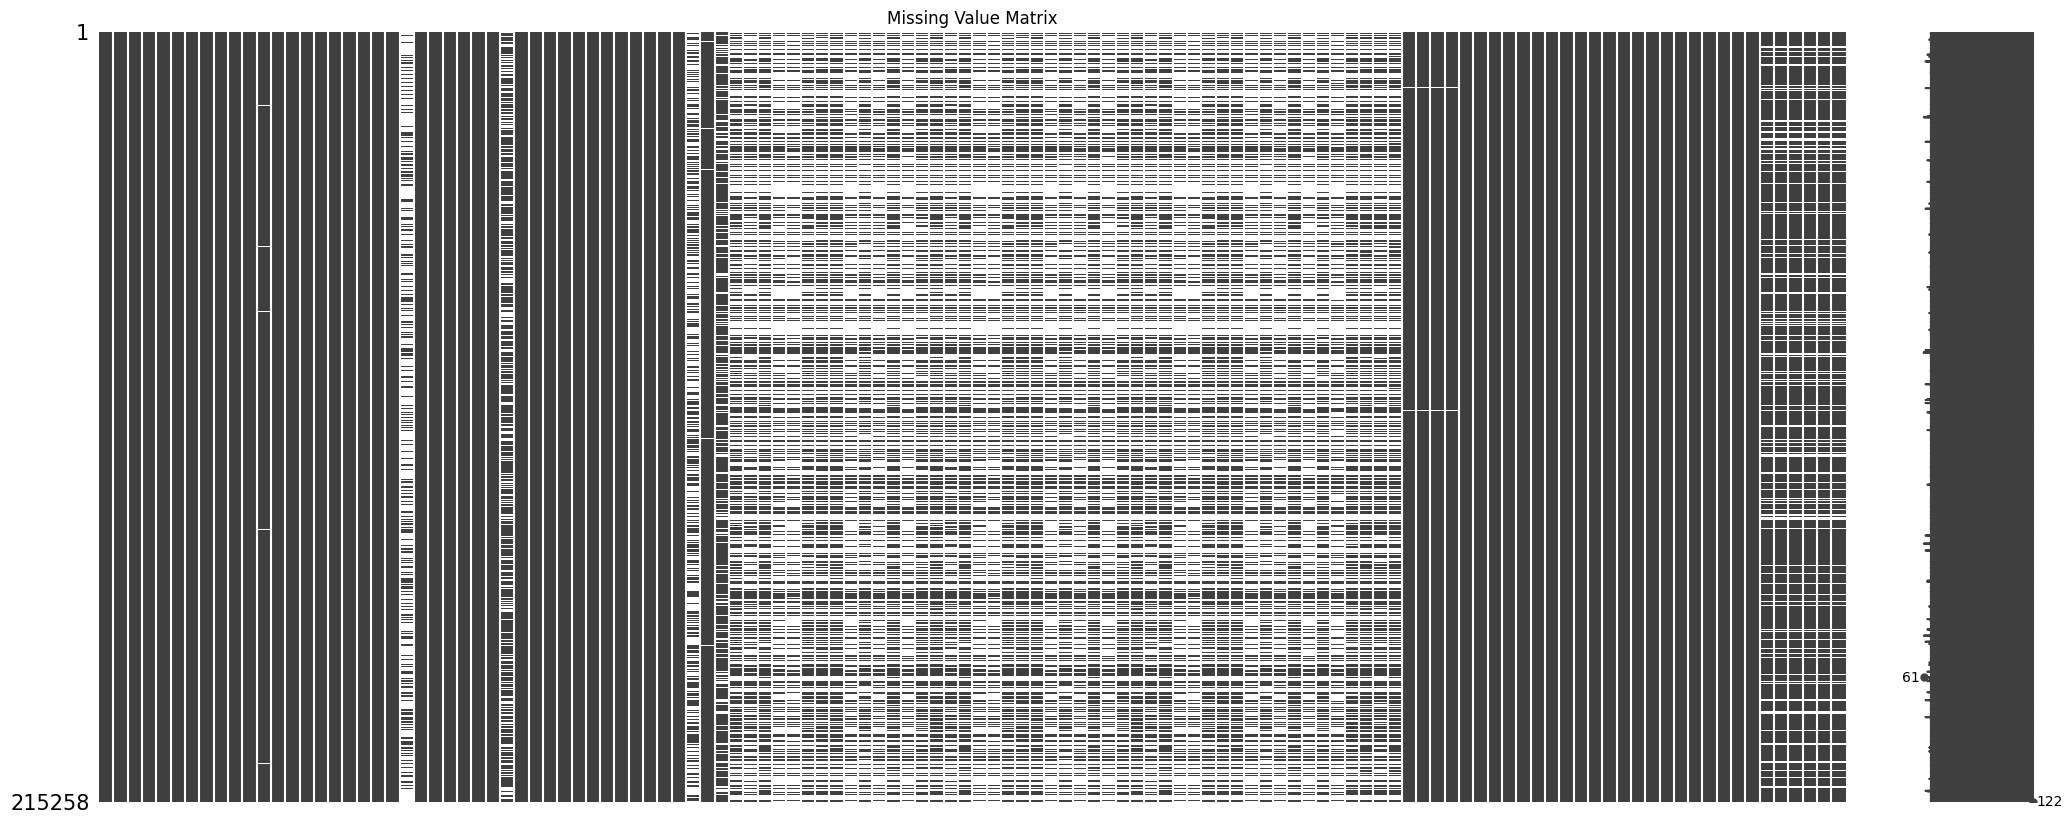

In [59]:
plt.figure(figsize=(12, 6))
msno.matrix(data, fontsize=12, sparkline=True)
plt.title('Missing Value Matrix')
plt.show()

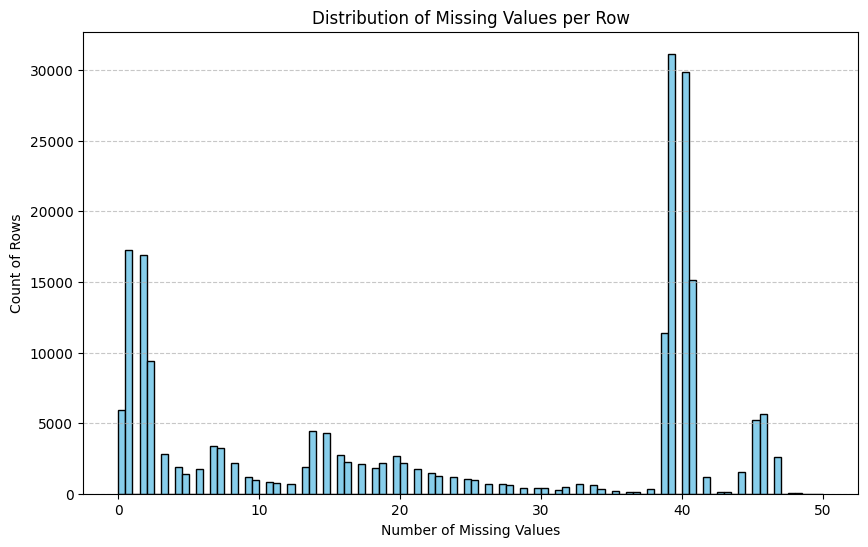

In [60]:
#visualising missing values accross rows
import matplotlib.pyplot as plt

# Calculate the number of missing values per row
rows_with_missing = (data.isna().sum(axis=1)/data.shape[1])*100

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(rows_with_missing, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Missing Values per Row')
plt.xlabel('Number of Missing Values')
plt.ylabel('Count of Rows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Inference**: Since Number of data records(rows) with 30-40 missing values is huge. It won't make sense to drop those records

<ipython-input-61-7f6a31d0ba25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


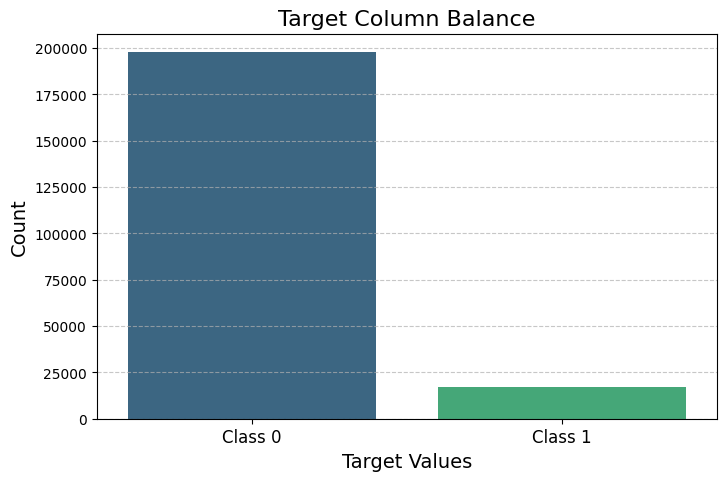

In [61]:
target_counts = data['TARGET'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")
plt.title('Target Column Balance', fontsize=16)
plt.xlabel('Target Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Class 0', 'Class 1'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Inference** : Highly Unbalanced data. So, using F1 score as model evaluation metric, as mentioned in competition description, makes sense

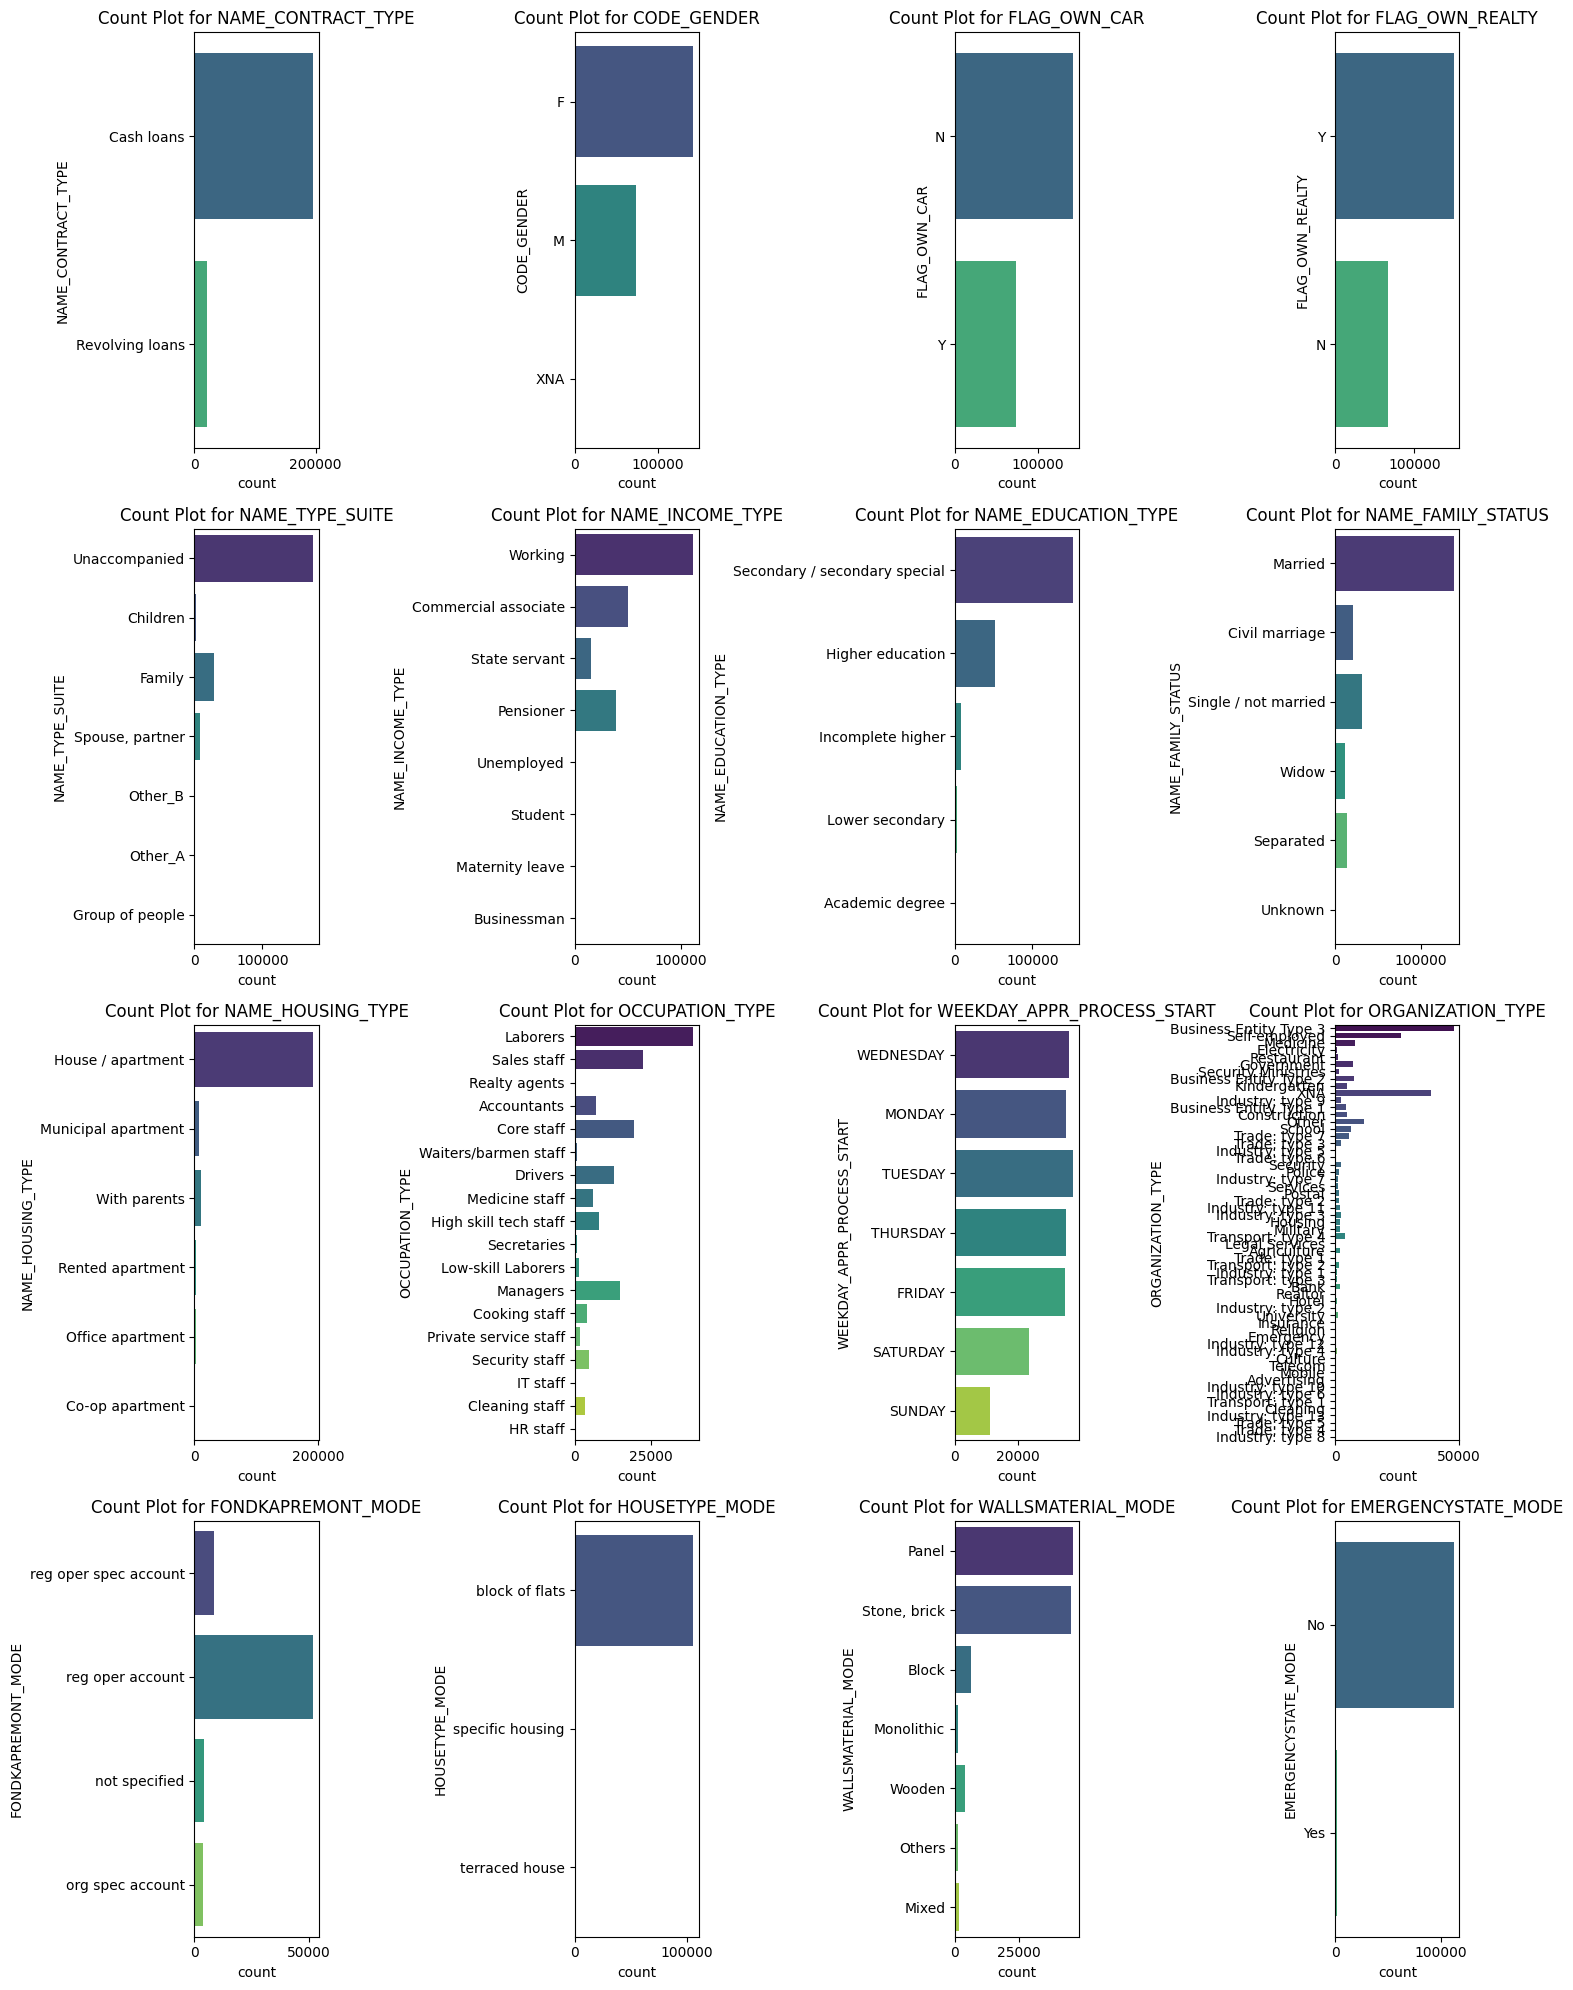

In [62]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

num_plots = 16
num_cols = 4
num_rows =4

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(y=data[col], palette='viridis', hue=data[col], legend=False)
    plt.title(f'Count Plot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

**Inference**: count of different categories in respective categorical columns is quite non-uniform. So, we need to be carefull that model do not have high bias.

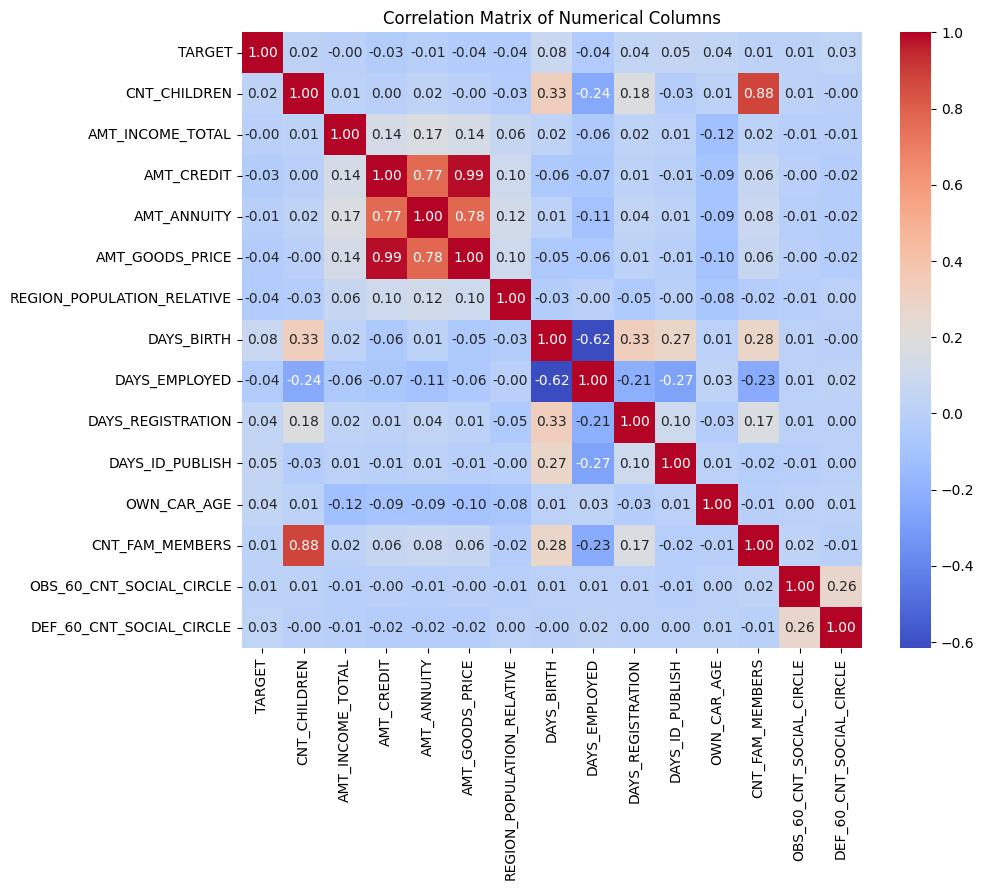

In [63]:
#visualizing correlation between different features
col_tocorr = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

correlation_matrix = data[col_tocorr].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**Inference**: Following pairs of columns are highly correlated

1.   CNT_FAM_MEMBERS and CNT_CHILDREN with corr. value = +0.88
2.   AMT_CREDIT and AMT_GOODS_PRICE with corr. value = +0.99
3.   AMT_CREDIT and AMT_ANNUITY with corr. value = +0.77
4.   AMT_ANNUITY and AMT_GOODS_PRICE with  corr. value = +0.78
5.   DAYS_BIRTH AND DAYS employed with corr. value = -0.62





In [64]:
#making list of columns to drop beacuse of high correlation value with other columns
cols_highcorr = ['AMT_CREDIT']

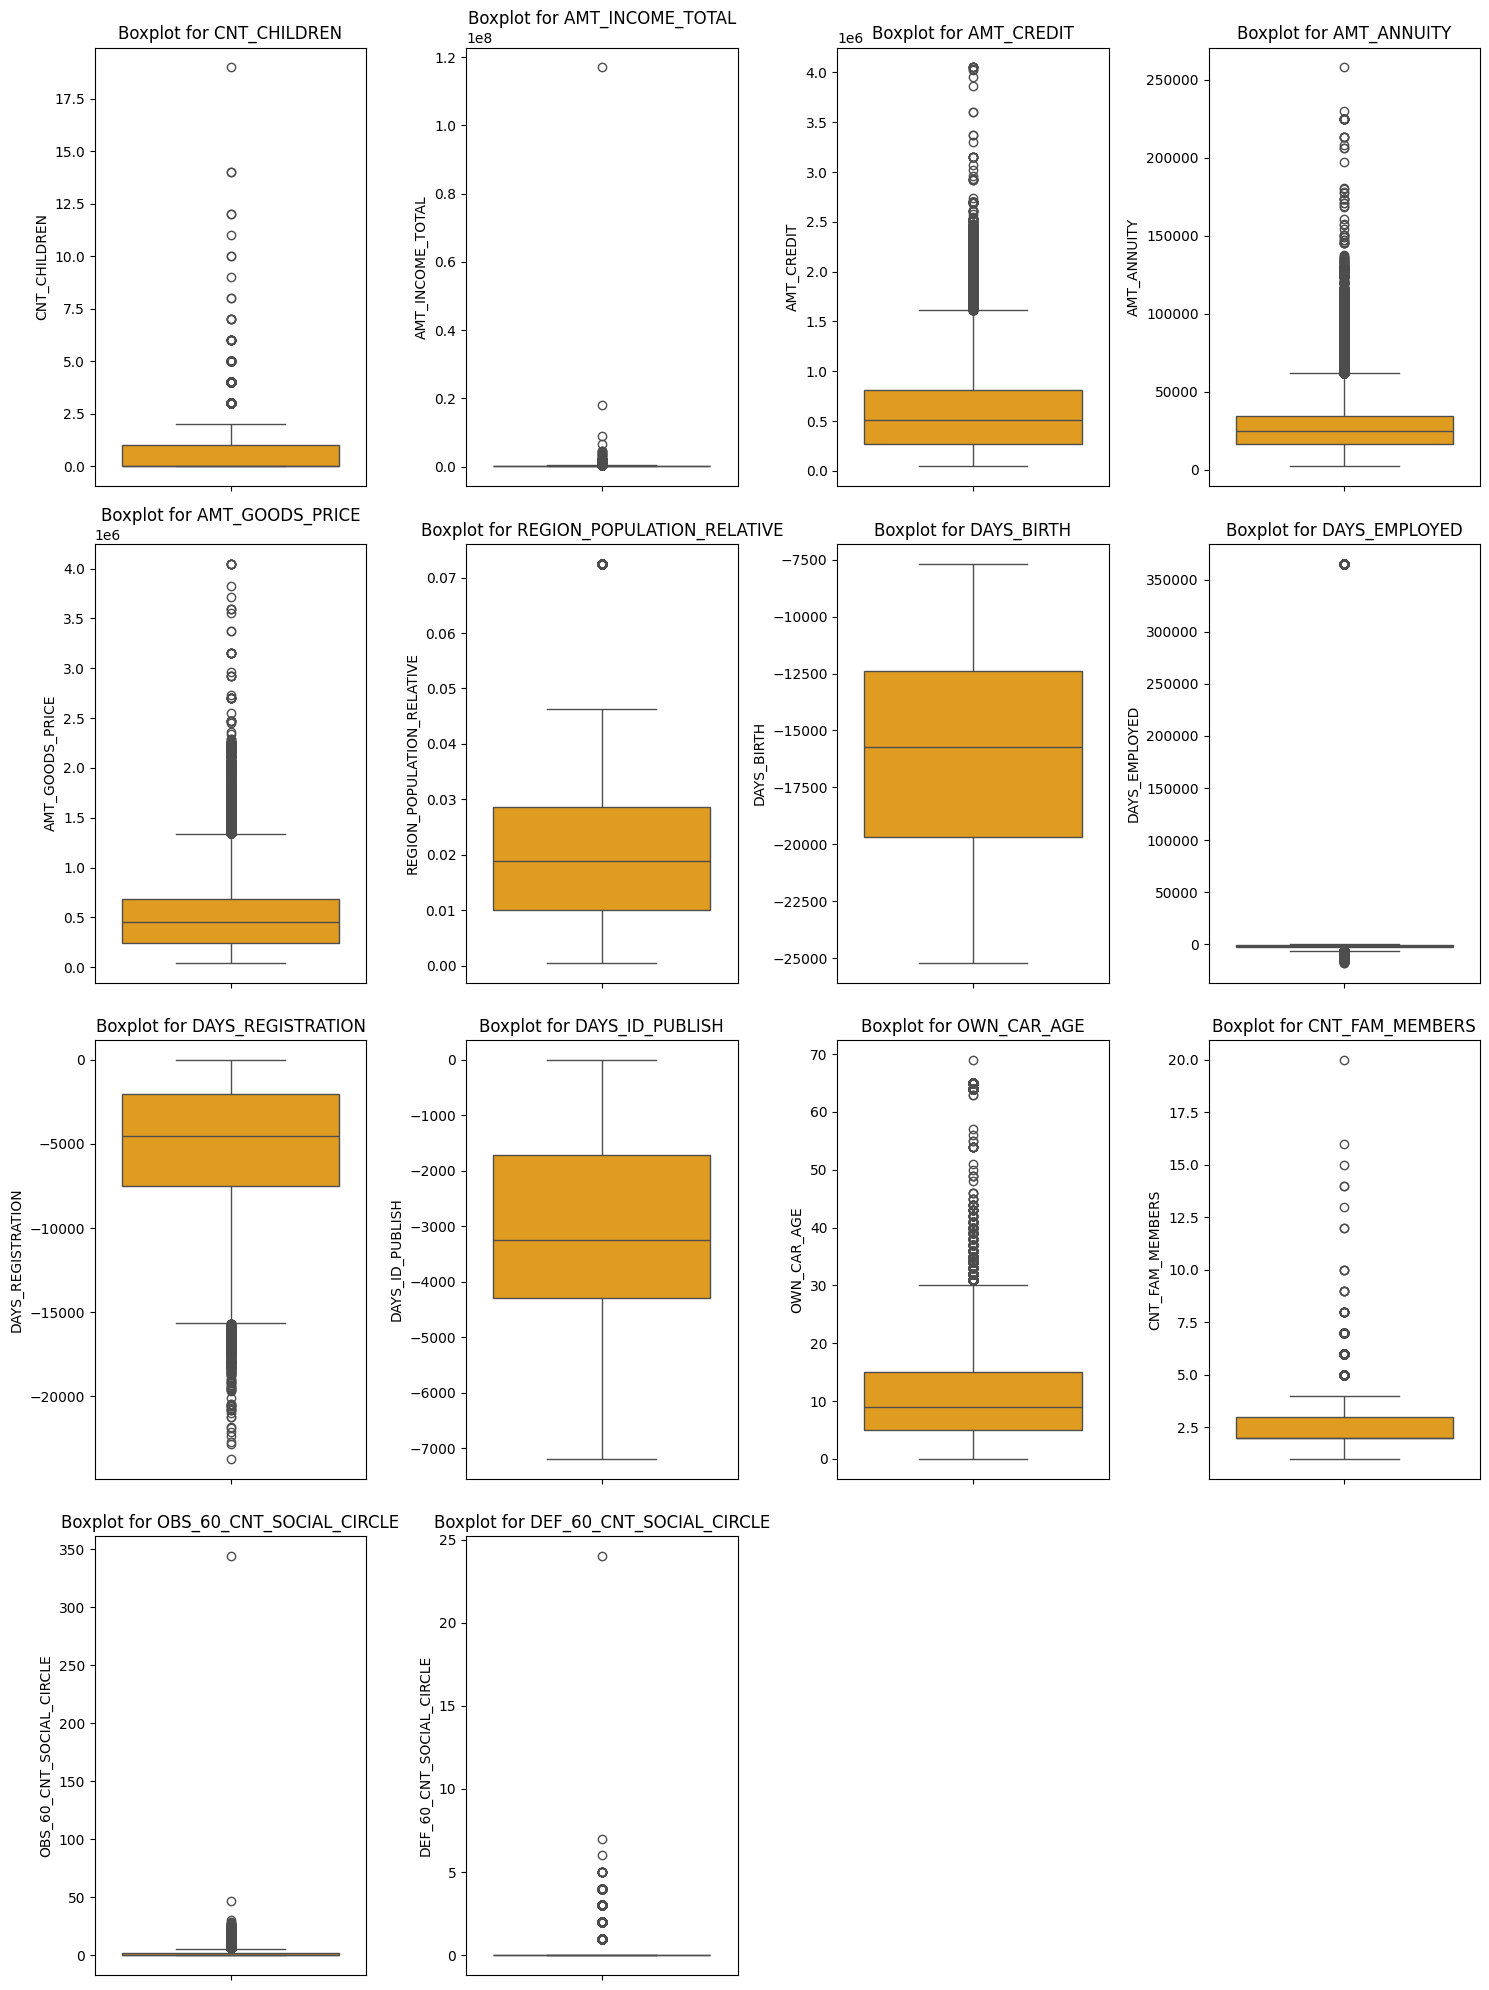

In [65]:
# visualizing outliers through box plots
outliercheck_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
# Boxplot for numerical features
num_plots = 16
num_cols = 4
num_rows =4

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(outliercheck_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data[col], color='orange')
    plt.title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [66]:
# Function to calculate error percentages
def calculate_error_percentages(data, columns):
    error_percentages = {}

    for col in columns:
        # Calculate IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count errors (outliers or negative values where inappropriate)
        errors = ((data[col] < lower_bound) | (data[col] > upper_bound) | (data[col] < 0)).sum()
        error_percentages[col] = (errors / len(data)) * 100

    return error_percentages

error_percentages = calculate_error_percentages(data, outliercheck_cols)

for col, percentage in error_percentages.items():
    print(f"{col}: {percentage:.2f}% errors")

CNT_CHILDREN: 1.41% errors
AMT_INCOME_TOTAL: 4.55% errors
AMT_CREDIT: 2.14% errors
AMT_ANNUITY: 2.43% errors
AMT_GOODS_PRICE: 4.82% errors
REGION_POPULATION_RELATIVE: 2.74% errors
DAYS_BIRTH: 100.00% errors
DAYS_EMPLOYED: 100.00% errors
DAYS_REGISTRATION: 99.97% errors
DAYS_ID_PUBLISH: 100.00% errors
OWN_CAR_AGE: 1.61% errors
CNT_FAM_MEMBERS: 1.33% errors
OBS_60_CNT_SOCIAL_CIRCLE: 6.35% errors
DEF_60_CNT_SOCIAL_CIRCLE: 8.38% errors


**Inference** : Following columns have less than 3% records with outliers

 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS'

In [67]:
outliercols_todrop = ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS']
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove rows with outliers
data_cleaned = remove_outliers(data.copy(), outliercols_todrop)

## **Data Preprocessing**

In [213]:
# dropping columns with more than 60% missing  values
data = data.drop(cols_miss60, axis = 1)

data.head()

,ID,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196348,0,Cash loans,F,N,Y,2,225000.0,785398.5,33403.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-13629,-514,-7712.0,-2405,1,1,0,1,0,0,NaN,4.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Business Entity Type 3,NaN,0.726410,0.513694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-707.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,147976,0,Cash loans,M,N,Y,0,90000.0,592560.0,35937.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-11983,-1863,-11266.0,-3484,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,NaN,0.298043,NaN,0.1845,0.0881,0.9841,0.2000,0.1724,0.3333,0.0389,0.1718,0.0000,0.1880,0.0914,0.9841,0.2014,0.1724,0.3333,0.0398,0.1790,0.0000,0.1863,0.0881,0.9841,0.20,0.1724,0.3333,0.0396,0.1749,0.0000,block of flats,0.1859,Panel,No,3.0,0.0,3.0,0.0,-93.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,52662,0,Revolving loans,F,N,Y,1,126000.0,202500.0,10125.0,202500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15182,-2033,-4189.0,-4115,1,1,1,1,1,0,Sales staff,3.0,2,2,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.573605,0.429424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1753.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,101577,0,Cash loans,F,N,Y,0,157500.0,254700.0,18531.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006207,-13214,-232,-440.0,-391,1,1,1,1,0,1,Realty agents,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Self-employed,NaN,0.218951,NaN,0.2268,0.1590,0.9821,0.2400,0.2069,0.3333,0.1250,0.2320,0.0000,0.2311,0.1650,0.9821,0.2417,0.2069,0.3333,0.1278,0.2417,0.0000,0.2290,0.1590,0.9821,0.24,0.2069,0.3333,0.1272,0.2362,0.0000,block of flats,0.1975,Panel,No,0.0,0.0,0.0,0.0,-317.0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [216]:
#performing log tranformation
data['AMT_INCOME_TOTAL'] = np.log1p(data['AMT_INCOME_TOTAL'])
data['AMT_CREDIT'] = np.log1p(data['AMT_CREDIT'])
data['AMT_ANNUITY'] = np.log1p(data['AMT_ANNUITY'])
data['AMT_GOODS_PRICE'] = np.log1p(data['AMT_GOODS_PRICE'])

In [217]:
# Filling missing values with mean in numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = data[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# making Nan as seaprate category for Nan in categorical columns
categorical_cols = data.select_dtypes(exclude=np.number).columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna("None"))

In [218]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

In [219]:
#Below columns are expressed as negative days relative to the loan application date. Converting these into positive values for interpretability
tr = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
for col in tr:
  data[col] = (-data[col])/365

In [223]:
# splitting into x and y
x_data = data.drop(['ID','TARGET'],axis=1)
y_data = data['TARGET']

from sklearn.model_selection import train_test_split

#Split x_data and y_data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

In [224]:
#standardising the data
mean = np.mean(X_train)
std = np.std(X_train)

x_train_scaled = (X_train - mean) / (std+1)
x_val_scaled = (X_val - mean) / (std+1)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [205]:
def fe(data, todrop, logt, cols_highcorr):
  variables = [
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG",
    "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE",
    "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI"
  ]

  data = data.drop(todrop, axis = 1)

  for col in logt:
    data[col] = np.log1p(data[col])

  numerical_cols = data.select_dtypes(include=np.number).columns
  data[numerical_cols] = data[numerical_cols].apply(lambda col: col.fillna(col.mean()))

  # Fill missing values for categorical columns with the mode

  categorical_cols = data.select_dtypes(exclude=np.number).columns
  data[categorical_cols] = data[categorical_cols].apply(lambda col: col.fillna("None"))

  label_encoder = LabelEncoder()

  # Apply Label Encoding to all categorical columns
  for col in data.select_dtypes(include=['object']).columns:
      data[col] = label_encoder.fit_transform(data[col])


  # tr = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
  # for col in tr:
  #   data[col] = (-data[col])/365

  # data['CNT_FAM_MEMBERS']+= data['CNT_CHILDREN']
  #data = data.drop('CNT_CHILDREN', axis = 1)
  return data

In [206]:
td = ['PARTMENTS_AVG',
      'ELEVATORS_AVG',
      'ENTRANCES_AVG',
      'FLOORSMAX_AVG',
      'ELEVATORS_MEDI',
      'ENTRANCES_MEDI',
      'FLOORSMAX_MEDI']

In [207]:
data2 = fe(data.copy(), cols_miss60, logt_cols, cols_highcorr)
test2 = fe(test.copy(), cols_miss60, logt_cols, cols_highcorr)

In [208]:
id_col = test2['ID']
test2.drop('ID', axis = 1, inplace = True)
x_data = data2.drop(['ID','TARGET'],axis=1)
y_data = data2['TARGET']

# **Training and evaluating models**

In [230]:
#importing required dependencies
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [231]:
#declaring gaussian Naive Bayes model
nb_model = GaussianNB()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Store F1 scores for each fold
f1_scores = []

for train_index, test_index in kf.split(x_data):
    X_train_fold, X_test_fold = x_data.iloc[train_index], x_data.iloc[test_index]  # Use iloc to select rows by position
    y_train_fold, y_test_fold = y_data.iloc[train_index], y_data.iloc[test_index]  # Use iloc for y_data as well

    m = np.mean(X_train_fold)
    s = np.std(X_train_fold)
    X_train_fold = (X_train_fold - m) / (s+1)
    X_test_fold = (X_test_fold - m) / (s+1)

    #using PCA to reduce dimensionality of data
    pca = PCA(n_components=100)  # Keep top 50 principal components
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    # Fit the model
    nb_model.fit(X_train_fold, y_train_fold)

    # Get the predicted probabilities for class 1 (positive class)
    y_test_pred = nb_model.predict(X_test_fold)

    # Calculate F1 score for the fold
    fold_f1 = f1_score(y_test_fold, y_test_pred)
    f1_scores.append(fold_f1)

# Print the results
print(f"F1 scores from manual cross-validation: {f1_scores}")
print(f"Mean F1 score from manual cross-validation: {sum(f1_scores) / len(f1_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

F1 scores from manual cross-validation: [0.15124795220198517, 0.15529930717042648, 0.15347195726821825, 0.15282120352109288, 0.1554929850963639]
Mean F1 score from manual cross-validation: 0.1537


**Note** : hyperparameters like C, max_iter, threshold has been obtained through hyperparameter tuning using **OPTUNA** library

In [225]:
#declaring Logistic regression model
log_reg_model = LogisticRegression(random_state=42, penalty='l2', solver='liblinear', class_weight='balanced',C=0.05, max_iter=1000)

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store F1 scores for each fold
f1_scores = []

for train_index, test_index in kf.split(x_data):
    # Split data into training and testing sets
    X_train_fold, X_test_fold = x_data.iloc[train_index], x_data.iloc[test_index]  # Use iloc to select rows by position
    y_train_fold, y_test_fold = y_data.iloc[train_index], y_data.iloc[test_index]  # Use iloc for y_data as well

    m = np.mean(X_train_fold)
    s = np.std(X_train_fold)
    X_train_fold = (X_train_fold - m) / (s+1)
    X_test_fold = (X_test_fold - m) / (s+1)

    #using PCA to reduce dimensionality of data
    pca = PCA(n_components=100)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    # Fit the model
    log_reg_model.fit(X_train_fold, y_train_fold)

    # Get the predicted probabilities for class 1 (positive class)
    y_probs = log_reg_model.predict_proba(X_test_fold)
    threshold = 0.65

    # Apply the threshold to classify observations
    y_test_pred = (y_probs[:, 1] > threshold).astype(int)

    # Calculate F1 score for the fold
    fold_f1 = f1_score(y_test_fold, y_test_pred)
    f1_scores.append(fold_f1)

# Print the results
print(f"F1 scores from manual cross-validation: {f1_scores}")
print(f"Mean F1 score from manual cross-validation: {sum(f1_scores) / len(f1_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

F1 scores from manual cross-validation: [0.279344395805762, 0.2916878108190399, 0.2897750511247444, 0.302986906710311, 0.284944089456869]
Mean F1 score from manual cross-validation: 0.2897


**Inference**: Logistic regression clearly outperforms Naive Bayes by 88.48%

1.   F1_score of logistic regression : 0.2897
2.   F1_score of Gaussian Naive Bayes : 0.1537



In [232]:
#processing test data same way as train data for final prediction
test = test.drop(cols_miss60, axis = 1)

test['AMT_INCOME_TOTAL'] = np.log1p(test['AMT_INCOME_TOTAL'])
test['AMT_CREDIT'] = np.log1p(test['AMT_CREDIT'])
test['AMT_ANNUITY'] = np.log1p(test['AMT_ANNUITY'])
test['AMT_GOODS_PRICE'] = np.log1p(test['AMT_GOODS_PRICE'])

# Filling Nan values in numerical columns
numerical_cols = test.select_dtypes(include=np.number).columns
test[numerical_cols] = test[numerical_cols].apply(lambda col: col.fillna(col.mean()))

# filling Nan values in categorical columns
categorical_cols = test.select_dtypes(exclude=np.number).columns
test[categorical_cols] = test[categorical_cols].apply(lambda col: col.fillna("None"))

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Label Encoding
for col in test.select_dtypes(include=['object']).columns:
    test[col] = label_encoder.fit_transform(test[col])

tr = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']
for col in tr:
  test[col] = (-test[col])/365

test.drop('ID', axis = 1, inplace = True)

Inference

# **Final Submission on test data**

In [235]:
#scaling test data with same mean and std as train data
m = np.mean(x_data)
s = np.std(x_data)
x_data_scaled = (x_data - m)/s
test_scaled = (test - m)/s

#training on whole data
log_reg_model.fit(x_data_scaled, y_data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


LogisticRegression(C=0.05, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [237]:
# Get the predicted probabilities for class 1 (positive class)
y_probs = log_reg_model.predict_proba(test_scaled)
threshold = 0.65

# Apply the threshold to classify observations
sub_pred = (y_probs[:, 1]> threshold).astype(int)
submission = pd.DataFrame({'ID': id_col, 'TARGET': sub_pred})
submission.to_csv('submission.csv', index=False)

print("Submission file created.")

Submission file created.


In [197]:
!kaggle competitions submit -c statistella -f submission.csv -m "Message"

100% 710k/710k [00:00<00:00, 1.84MB/s]
Successfully submitted to Statistella: Data Analytics Competition